In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [68]:
data = pd.read_csv("Social_Network_Ads.csv")

In [69]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [70]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [71]:
col_to_drop = ["User ID", "Gender"]
data.drop(col_to_drop, axis =1, inplace= True)


In [72]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [73]:
X = data[["Age","EstimatedSalary"]].values
y = data["Purchased"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [74]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(280, 2) (120, 2)
(280,) (120,)


In [75]:
scalar = StandardScaler()
scalar.fit(X_train)

StandardScaler()

fit means that we are learning about the given columns

In [76]:
print(scalar.mean_)
print(scalar.scale_)

[3.75750000e+01 7.05892857e+04]
[1.01777813e+01 3.38878280e+04]


In [77]:
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [78]:
X_train = pd.DataFrame(X_train, columns = ["Age", "Salary"])
X_test = pd.DataFrame(X_test, columns = ["Age", "Salary"])


learning is always from train while we transform both train and test data. 

now, the problem is x_train and x_test are numpy arrays, so we have to convert them into pandas dataframes

In [79]:
X_train_sclaed = pd.DataFrame(X_train_scaled, columns = ["Age", "Salary"])
X_test_sclaed = pd.DataFrame(X_test_scaled, columns = ["Age", "Salary"])
X_train_sclaed

,Age,Salary
0,-0.842522,0.130156
1,0.041758,0.277702
2,0.729530,-1.315791
3,1.613809,1.103957
4,0.827784,-1.404318
...,...,...
275,-1.333788,-1.286281
276,-1.137281,-1.050209
277,0.533024,1.841685
278,0.140011,0.189175


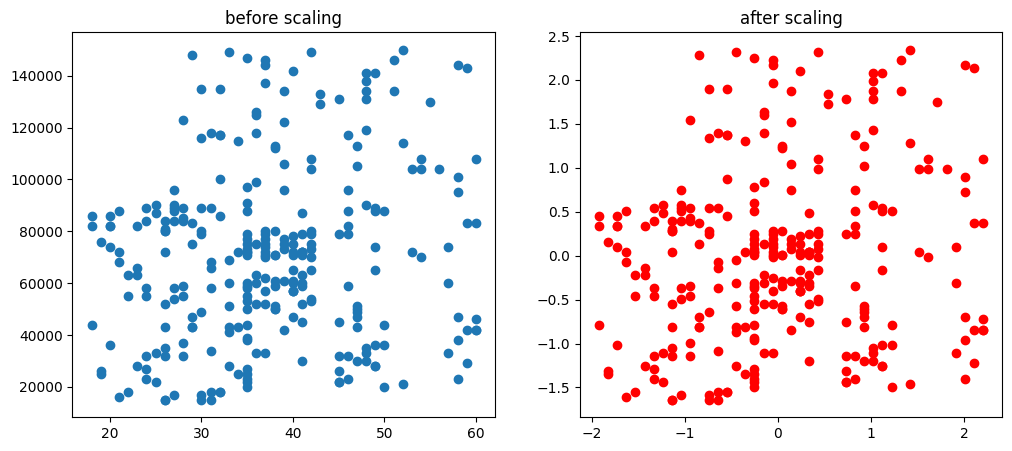

In [80]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
ax1.scatter(X_train['Age'], X_train['Salary'],)
ax1.set_title("before scaling")
ax2.scatter(X_train_scaled[:,0], X_train_scaled[:,1],color = 'red')
ax2.set_title("after scaling")
plt.show()

same data shape but scalled data

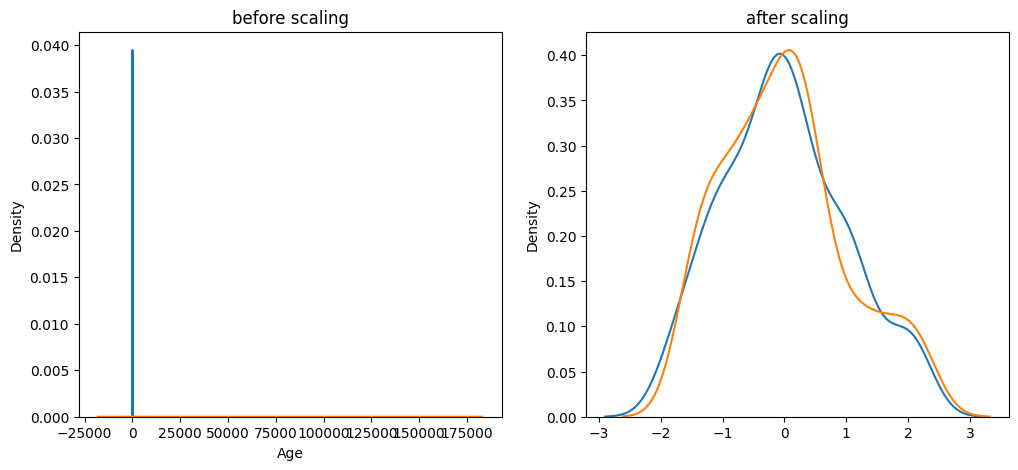

In [81]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title("before scaling")
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['Salary'], ax = ax1)

ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled[:,0],ax= ax2)
sns.kdeplot(X_train_scaled[:,1],ax= ax2)
plt.show()

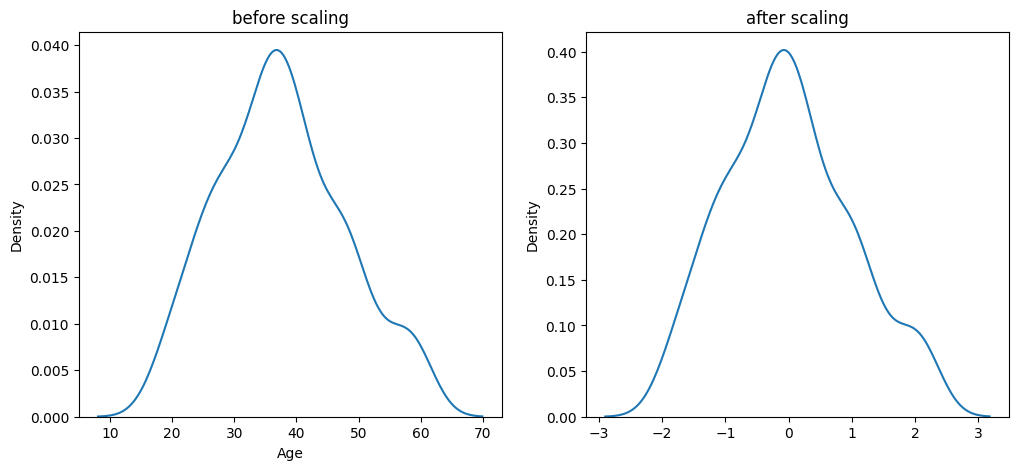

In [82]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title("before scaling")
sns.kdeplot(X_train['Age'], ax = ax1)

ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled[:,0],ax= ax2)
plt.show()

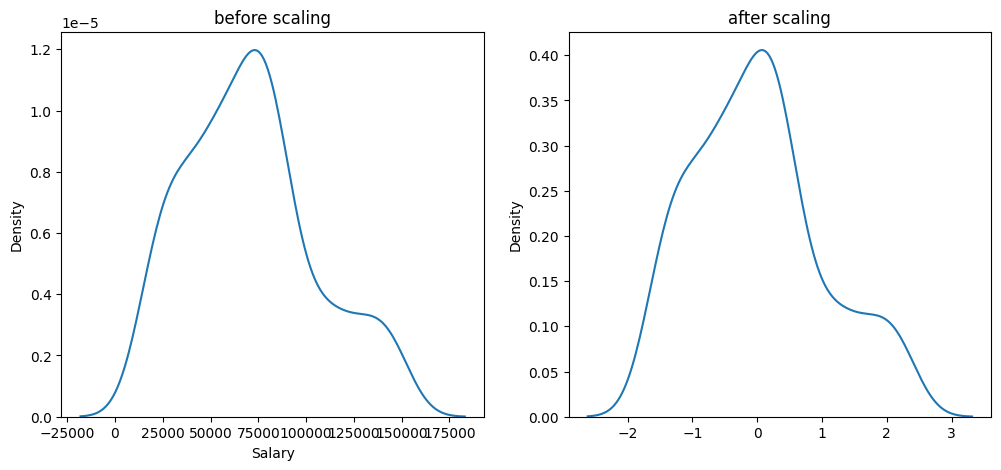

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title("before scaling")
sns.kdeplot(X_train['Salary'], ax = ax1)

ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled[:,1],ax= ax2)
plt.show()

as we can see, indivaduals after scaling and before scaling are same shape but different scale. 

standardization usually doesnt work for oultiers. the impact of outliers will be same either you apply standardization or not.

when to apply standardization:
1. kmeans
2. knn
3. PCA
4. ANN
5. Gradient descent